## Library Import and Data Read

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [3]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("Data\Customer Segmentation - Income by Product.csv")
#    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.")
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has {} samples with {} features each.


## Colume Display & Remove columns

In [4]:
data.columns

Index(['Customer', 'Total Income', 'SFL_Function_Skills', 'Building_Services',
       'Health_and_Social_Care', 'Business_Skills', 'Construction_Energy',
       'LBS', 'Hair', 'Employability', 'Learning', 'Hospitality', 'Utilities',
       'Transport_Maintenance', 'Engineering', 'Beauty', 'IT_Professional'],
      dtype='object')

In [5]:
data.drop(['Customer', 'Total Income', 'SFL_Function_Skills'], axis = 1, inplace = True)

##  N/A value fill in 0

In [6]:
data.fillna(0,inplace=True)
data.head()

,Building_Services,Health_and_Social_Care,Business_Skills,Construction_Energy,LBS,Hair,Employability,Learning,Hospitality,Utilities,Transport_Maintenance,Engineering,Beauty,IT_Professional
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8178.0,0.0,25.0,7472.0,0.0,1187.0,15365.0,0.0,2247.0,0.0,6987.0,0.0,0.0,0.0
2,34190.0,0.0,1862.0,29537.0,0.0,10709.0,9778.0,0.0,0.0,0.0,14561.0,13785.0,6635.0,2853.0
3,40942.0,12205.0,0.0,66.0,0.0,0.0,0.0,7265.0,0.0,0.0,0.0,1466.0,0.0,0.0
4,40283.0,12328.0,607.0,0.0,0.0,9252.0,0.0,3554.0,8203.0,0.0,12736.0,31102.0,68.0,1389.0


## Basic Stats 

In [7]:
# Display a description of the dataset
stats = data.describe()
stats

,Building_Services,Health_and_Social_Care,Business_Skills,Construction_Energy,LBS,Hair,Employability,Learning,Hospitality,Utilities,Transport_Maintenance,Engineering,Beauty,IT_Professional
count,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000
mean,2597.064099,1956.672607,1728.551308,1556.880425,1436.011210,899.592986,868.669733,760.281690,748.398678,734.701351,700.423398,660.211842,485.619143,441.909169
std,11817.358982,16085.395885,13382.070381,6553.903305,10687.415032,3440.903487,6475.873212,3233.416809,2736.276058,6716.909846,4972.459980,5291.126876,2902.255461,5411.083228
min,-44.000000,-35.000000,-115.000000,-13.000000,-1364.000000,-2525.000000,0.000000,-793.000000,-92.000000,-1276.000000,-224.000000,-88.000000,-3866.000000,-132.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,241822.000000,744096.000000,620441.000000,134010.000000,229614.000000,48784.000000,186554.000000,90037.000000,31930.000000,206217.000000,214458.000000,182703.000000,105859.000000,196491.000000


## Pairplot
Historgram for individual feature & scatter plot for combination

In [8]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


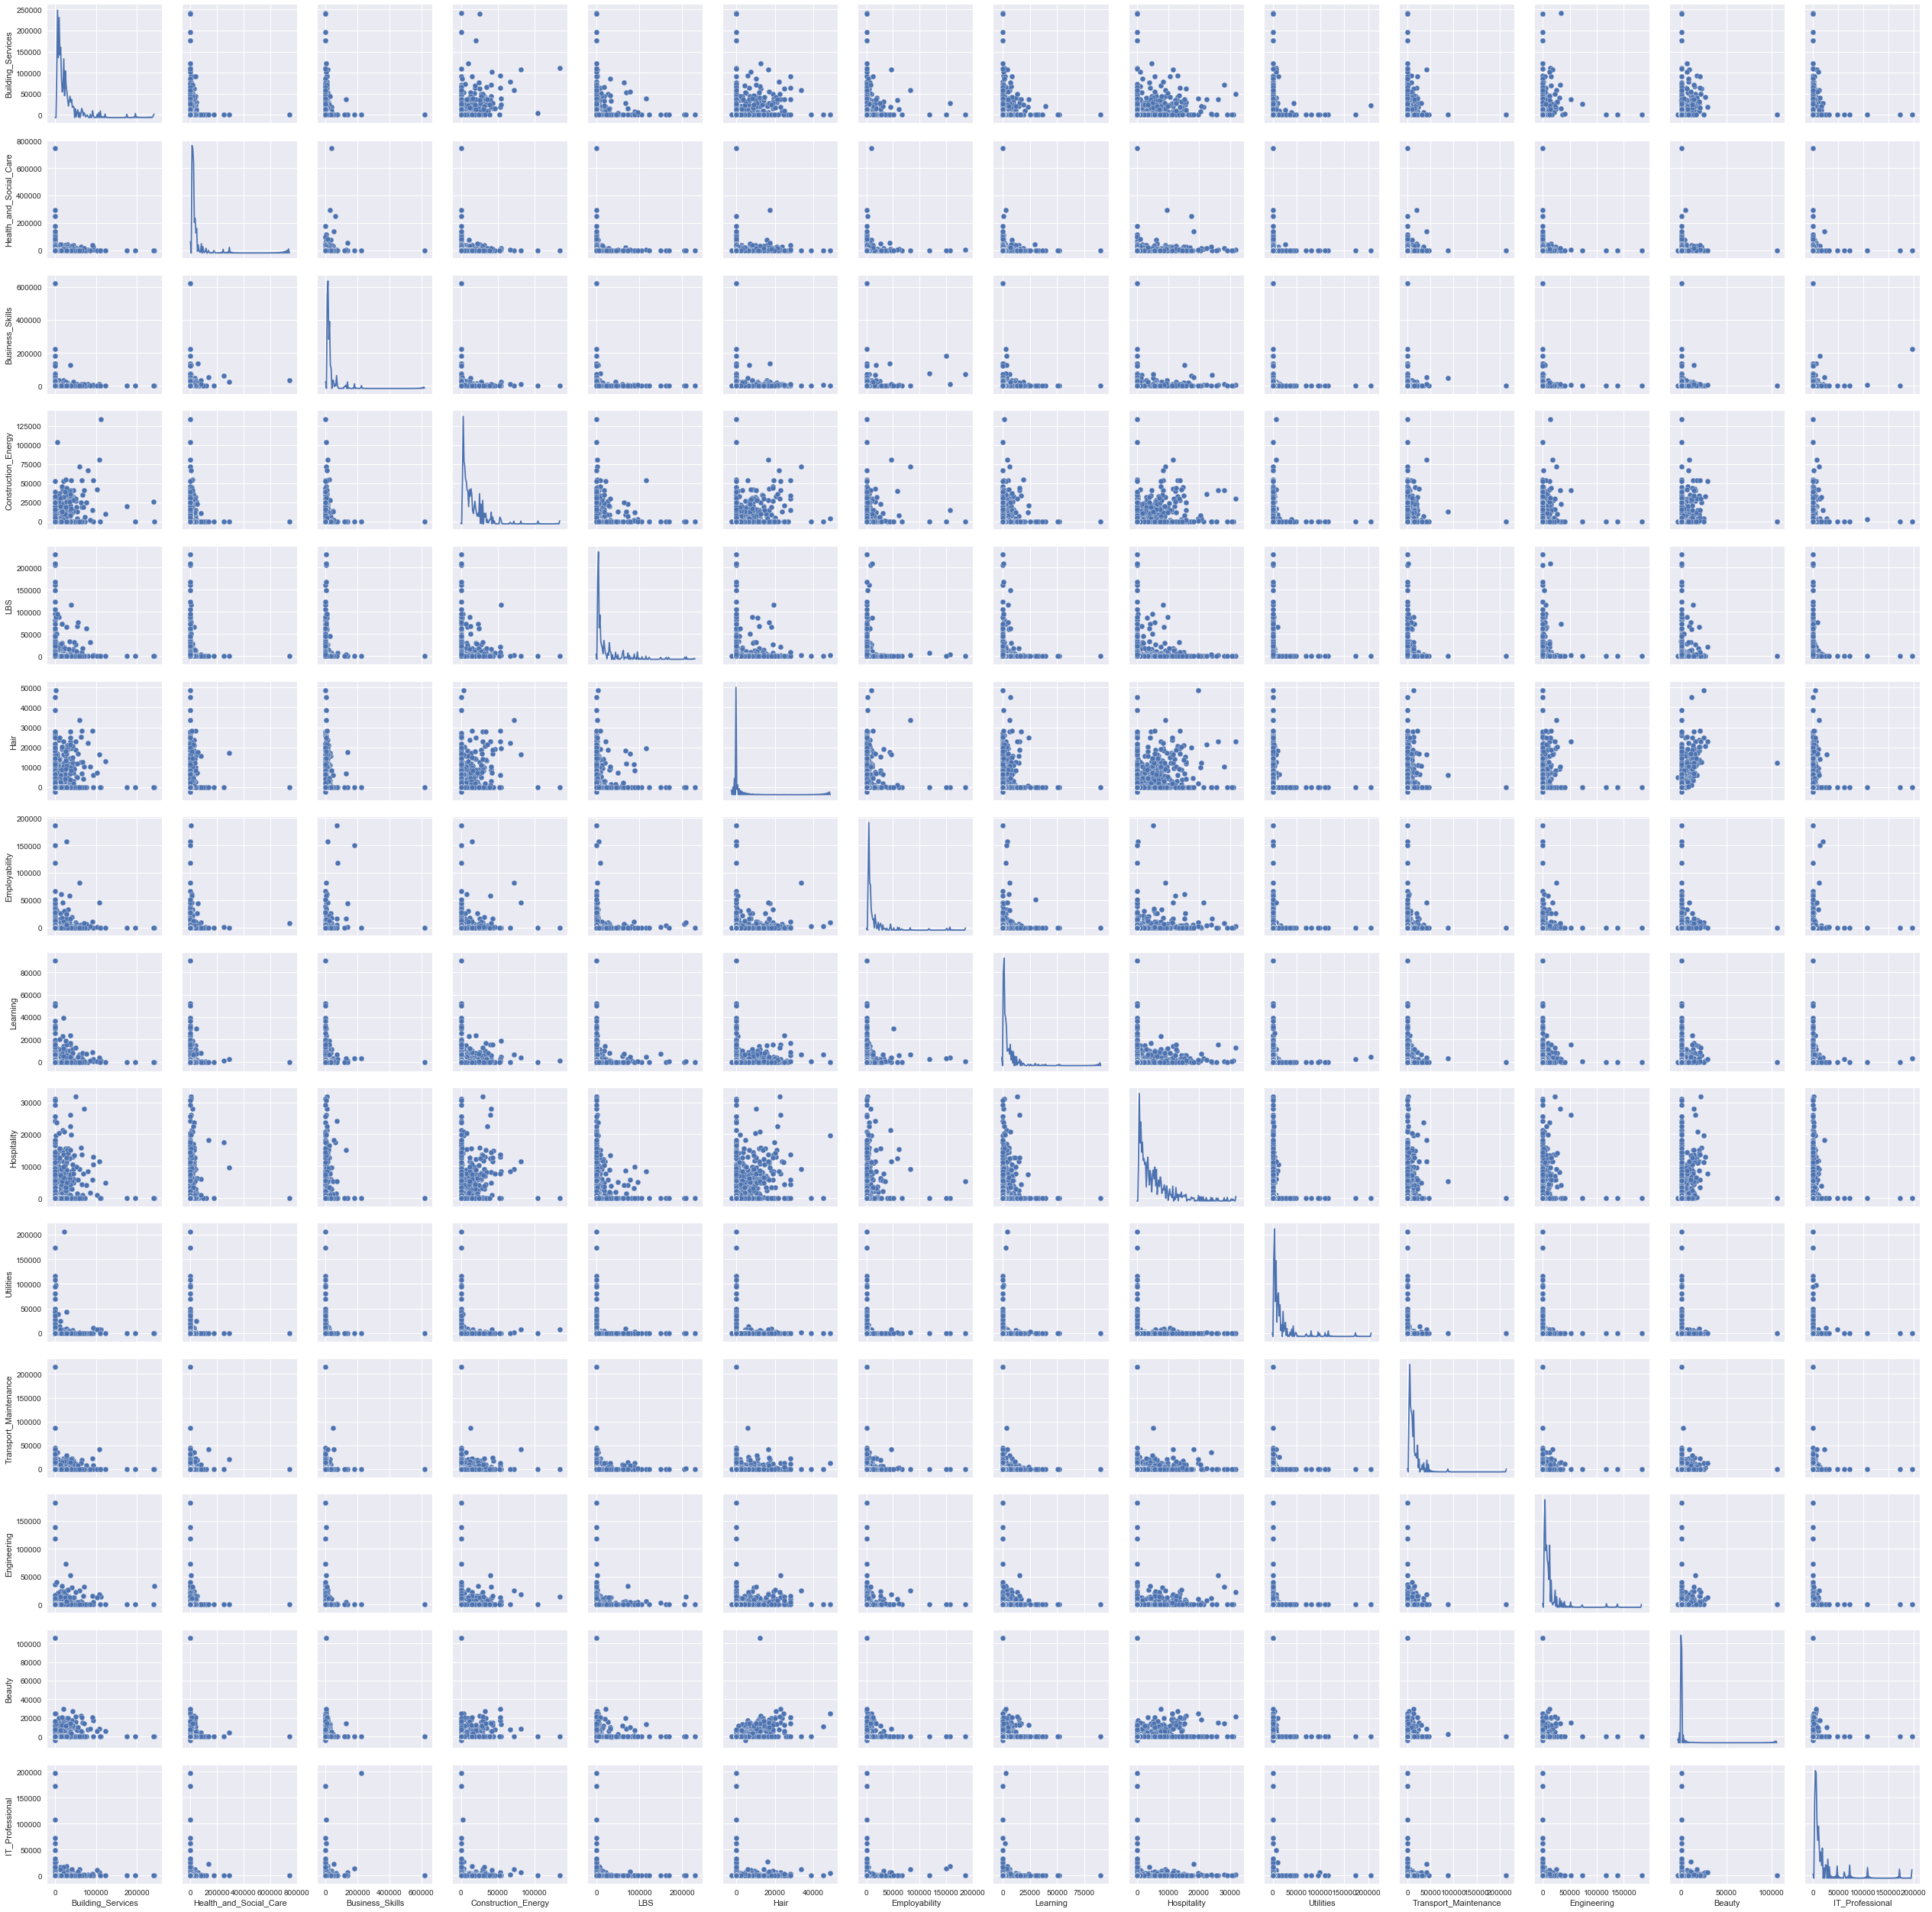

In [9]:
sns.pairplot(data, diag_kind = "kde")

In [10]:
data_out = data

## Correlation Matrix
* This is to cross-reference with the scatter matrix above to draw more accurate insights from the data.
* The higher the color is on the bar, the higher the correlation.

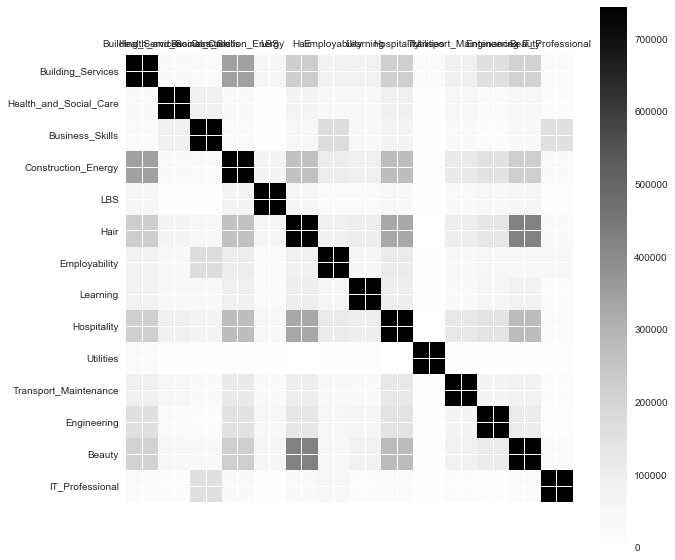

In [11]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data_out)

## Implement PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [13]:
scaler = StandardScaler()
scaler.fit(data_out)
scaled_data = scaler.transform(data_out)

#### 2 Principal components

In [14]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(3479, 14)

#### Interpreting the components

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.
The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [16]:
pca.components_

array([[ 0.3727078 ,  0.08901661,  0.09037472,  0.40893423,  0.08944484,
         0.44592672,  0.15673999,  0.15620369,  0.41690671, -0.01121496,
         0.17312876,  0.22336136,  0.40701092,  0.04993375],
       [-0.12579206,  0.25549981,  0.66621466, -0.08766434, -0.06551613,
        -0.08182106,  0.45040298,  0.06108744,  0.01299544, -0.03820207,
         0.01622777, -0.08474732, -0.12631481,  0.47408698]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [17]:
df_comp = pd.DataFrame(pca.components_,columns=data_out.columns)

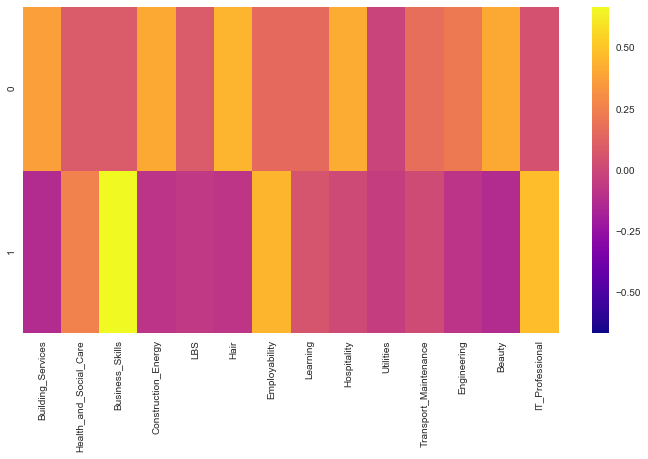

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

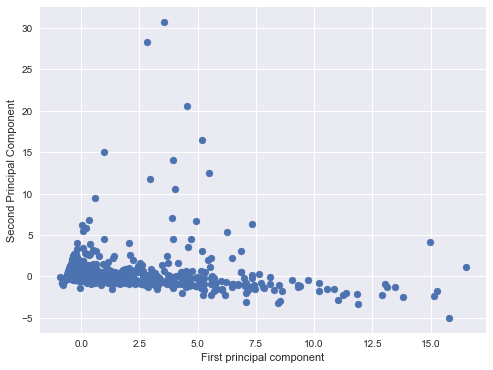

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## K Means Clustering
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity.

### Creating cluster

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Centre of Clusters

In [24]:
kmeans.cluster_centers_

array([[-0.33935848, -0.02112277],
       [ 5.77788583,  0.35963431]])

#### plotting the clusters

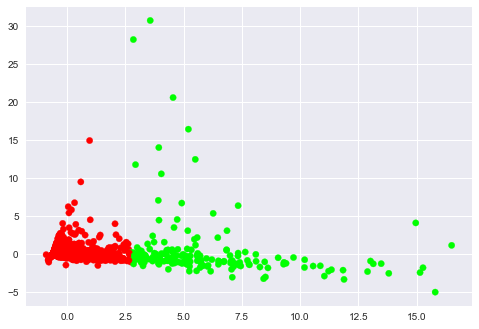

In [25]:
colormap = np.array(['red', 'lime', 'black','blue'])
plt.scatter(pd.DataFrame(x_pca)[0], pd.DataFrame(x_pca)[1], c=colormap[kmeans.labels_], s=40)